# **Project Name:** Petrol Price Forecasting  using Tensor Flow

## Petrol Prices are going up continously these days and it has become very hard to predict what will be the price range in the next few months or even days.
### In this project we will try to forecast the different petrol prices for the upcoming dates given to us. 

**Importing Libraries & Dataset**

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
petrolprice_df = pd.read_csv("/Users/bilaldilbar/Documents/GeorgeBrown/Projects/Petrol Price Forecasting/Dataset/train_data.csv")
petrolprice_df.head()

,Date,Petrol (USD)
0,6/9/2003,74.59
1,6/16/2003,74.47
2,6/23/2003,74.42
3,6/30/2003,74.35
4,7/7/2003,74.28


In [3]:
petrolprice_df.rename(columns={"Petrol (USD)": "Petrol"}, inplace=True)
petrolprice_df.head()

,Date,Petrol
0,6/9/2003,74.59
1,6/16/2003,74.47
2,6/23/2003,74.42
3,6/30/2003,74.35
4,7/7/2003,74.28


**Data Analysis**

In [4]:
petrolprice_df.shape

(813, 2)

In [5]:
petrolprice_df.info

<bound method DataFrame.info of            Date  Petrol
0      6/9/2003   74.59
1     6/16/2003   74.47
2     6/23/2003   74.42
3     6/30/2003   74.35
4      7/7/2003   74.28
..          ...     ...
808   12/3/2018  124.30
809  12/10/2018  122.37
810  12/17/2018  121.02
811  12/24/2018  120.61
812  12/31/2018  120.18

[813 rows x 2 columns]>

In [6]:
petrolprice_df.describe()

,Petrol
count,811.000000
mean,110.330481
std,19.241182
min,74.210000
25%,94.525000
50%,112.420000
75%,128.560000
max,189.510000


In [7]:
petrolprice_df.dtypes

Date       object
Petrol    float64
dtype: object

In [8]:
petrolprice_df.isnull().sum()

Date      0
Petrol    2
dtype: int64

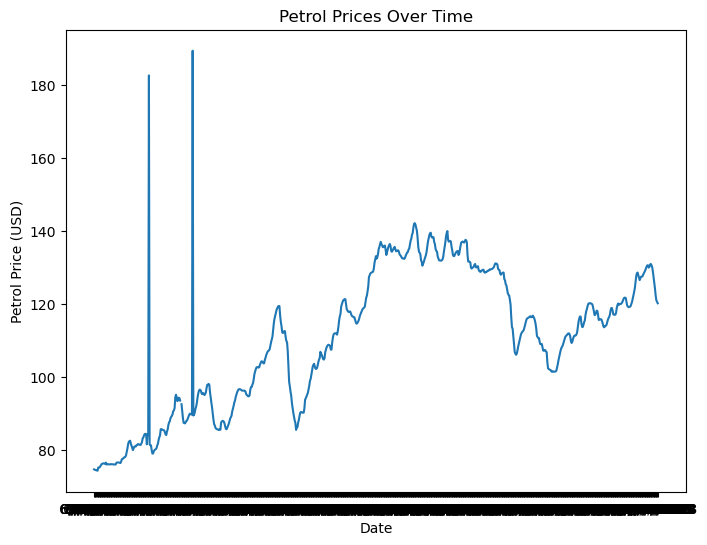

In [9]:
plt.figure(figsize=(8, 6))
plt.plot(petrolprice_df['Date'], petrolprice_df['Petrol'])
plt.title('Petrol Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Petrol Price (USD)')
plt.show()

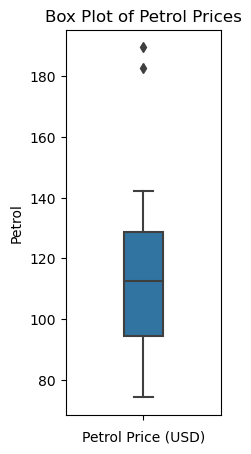

In [10]:
plt.figure(figsize=(2, 5))
sns.boxplot(y=petrolprice_df['Petrol'],  width=0.25)
plt.title('Box Plot of Petrol Prices')
plt.xlabel('Petrol Price (USD)')
plt.show()

**Data Imputation**

In [11]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [12]:
imputer = IterativeImputer(max_iter=10, random_state=0)
petrolprice_df['Petrol'] = imputer.fit_transform(petrolprice_df[['Petrol']])
petrolprice_df.isna().sum()

Date      0
Petrol    0
dtype: int64

**Removing Outliers**

In [13]:
from sklearn.ensemble import IsolationForest

In [14]:
model = IsolationForest(contamination=0.05)
petrolprice_df['Outlier'] = model.fit_predict(petrolprice_df[['Petrol']])
petrolprice_df = petrolprice_df[petrolprice_df['Outlier'] != -1]

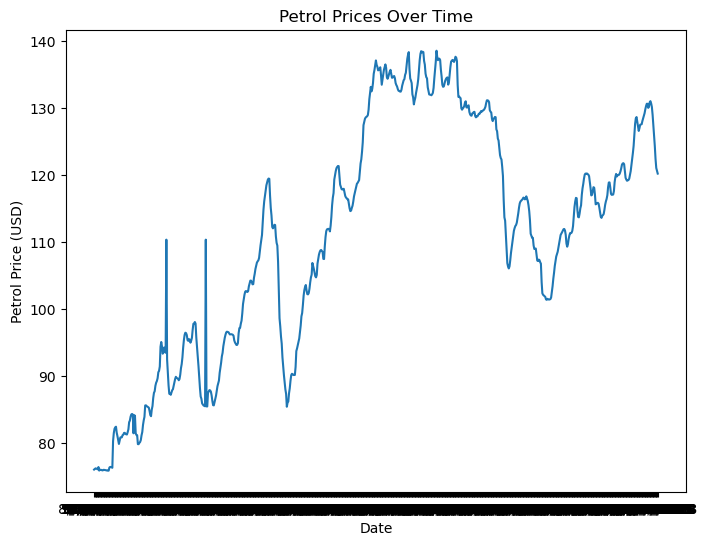

In [15]:
plt.figure(figsize=(8, 6))
plt.plot(petrolprice_df['Date'], petrolprice_df['Petrol'])
plt.title('Petrol Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Petrol Price (USD)')
plt.show()

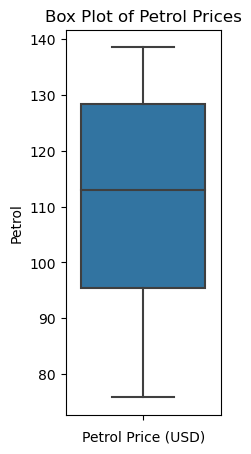

In [16]:
plt.figure(figsize=(2, 5))
sns.boxplot(y=petrolprice_df['Petrol'])
plt.title('Box Plot of Petrol Prices')
plt.xlabel('Petrol Price (USD)')
plt.show()

In [17]:
petrolprice_df=petrolprice_df.reset_index()['Petrol']
petrolprice_df.head()

0    76.05
1    76.13
2    76.23
3    76.20
4    76.15
Name: Petrol, dtype: float64

**Data Scaling**

In [18]:
from sklearn.preprocessing import MinMaxScaler

In [19]:
scaler = MinMaxScaler(feature_range=(0,1))
petrolprice_df = scaler.fit_transform(np.array(petrolprice_df).reshape(-1,1))

In [20]:
petrolprice_df

array([[2.71478761e-03],
       [3.99233472e-03],
       [5.58926860e-03],
       [5.11018844e-03],
       [4.31172149e-03],
       [3.19386777e-03],
       [8.78313638e-03],
       [3.19386777e-04],
       [2.71478761e-03],
       [1.91632066e-03],
       [1.91632066e-03],
       [9.58160332e-04],
       [7.98466943e-04],
       [2.23570744e-03],
       [1.91632066e-03],
       [1.43724050e-03],
       [1.27754711e-03],
       [6.38773555e-04],
       [9.58160332e-04],
       [0.00000000e+00],
       [3.19386777e-04],
       [7.66528266e-03],
       [8.94282977e-03],
       [8.94282977e-03],
       [7.98466943e-03],
       [7.02650910e-03],
       [7.05844778e-02],
       [8.95879911e-02],
       [9.98083679e-02],
       [1.03321622e-01],
       [1.04758863e-01],
       [9.03864580e-02],
       [8.24017886e-02],
       [7.23411051e-02],
       [6.37176621e-02],
       [7.12232514e-02],
       [7.92079208e-02],
       [7.96870010e-02],
       [7.95273076e-02],
       [8.46374960e-02],


**Splitting The Data**

In [21]:
training_size = int(len(petrolprice_df) * 0.65)
test_size = len(petrolprice_df) - training_size
train_data, test_data = petrolprice_df[0:training_size,:], petrolprice_df[training_size:len(petrolprice_df), :1]

In [22]:
train_data.shape

(502, 1)

In [23]:
test_data.shape

(271, 1)

**Data Pre-Processing**

In [24]:
def create_dataset(dataset, time_step=1):
    dataX = [dataset[i:(i+time_step), 0] for i in range(len(dataset)-time_step-1)]
    dataY = [dataset[i + time_step, 0] for i in range(len(dataset)-time_step-1)]
    return np.array(dataX), np.array(dataY)

In [25]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [26]:
X_train

array([[0.00271479, 0.00399233, 0.00558927, ..., 0.29160013, 0.28090067,
        0.5501514 ],
       [0.00399233, 0.00558927, 0.00511019, ..., 0.28090067, 0.5501514 ,
        0.26493133],
       [0.00558927, 0.00511019, 0.00431172, ..., 0.5501514 , 0.26493133,
        0.23395081],
       ...,
       [0.96119451, 0.96742255, 0.95927819, ..., 0.9856276 , 0.98355158,
        0.97524752],
       [0.96742255, 0.95927819, 0.9370808 , ..., 0.98355158, 0.97524752,
        0.91855637],
       [0.95927819, 0.9370808 , 0.93324816, ..., 0.97524752, 0.91855637,
        0.89013095]])

In [27]:
y_train

array([0.26493133, 0.23395081, 0.20328968, 0.18316832, 0.18316832,
       0.18077292, 0.18652188, 0.19163207, 0.19402747, 0.20249122,
       0.20967742, 0.21830086, 0.22357074, 0.22117534, 0.2198978 ,
       0.21909933, 0.21542638, 0.21830086, 0.22852124, 0.2440115 ,
       0.25391249, 0.26972213, 0.29303737, 0.31092303, 0.32337911,
       0.32864899, 0.32753114, 0.32290003, 0.31108272, 0.3091664 ,
       0.31315874, 0.31236027, 0.30485468, 0.30964548, 0.3163526 ,
       0.33535612, 0.34972852, 0.35052699, 0.35404024, 0.35036729,
       0.31715107, 0.29575216, 0.27147876, 0.24912169, 0.22197381,
       0.19674225, 0.17678058, 0.17119131, 0.16017247, 0.15745768,
       0.15522197, 0.15426381, 0.15346535, 0.5501514 , 0.15314596,
       0.15298627, 0.18460556, 0.18875759, 0.19195145, 0.19115299,
       0.18811881, 0.17917598, 0.16608112, 0.15618013, 0.15554136,
       0.16352603, 0.17119131, 0.1786969 , 0.18939636, 0.20121367,
       0.20839987, 0.21462791, 0.23299265, 0.24433088, 0.25726

In [28]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [29]:
X_train.shape

(401, 100, 1)

In [30]:
X_test.shape

(170, 100, 1)

**LSTM Model Building**

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.metrics import mean_squared_error

In [32]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape = (100,1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [34]:
model.fit(X_train, y_train, validation_data = (X_test, ytest), epochs = 200, batch_size = 128, verbose=1)

Epoch 1/200
4/4 [==============================] - 2s 249ms/step - loss: 0.3364 - val_loss: 0.1072
Epoch 2/200
4/4 [==============================] - 1s 124ms/step - loss: 0.0596 - val_loss: 0.0892
Epoch 3/200
4/4 [==============================] - 1s 125ms/step - loss: 0.0597 - val_loss: 0.0058
Epoch 4/200
4/4 [==============================] - 1s 127ms/step - loss: 0.0209 - val_loss: 0.0259
Epoch 5/200
4/4 [==============================] - 1s 123ms/step - loss: 0.0363 - val_loss: 0.0132
Epoch 6/200
4/4 [==============================] - 1s 126ms/step - loss: 0.0199 - val_loss: 0.0076
Epoch 7/200
4/4 [==============================] - 0s 120ms/step - loss: 0.0158 - val_loss: 0.0122
Epoch 8/200
4/4 [==============================] - 1s 123ms/step - loss: 0.0142 - val_loss: 0.0046
Epoch 9/200
4/4 [==============================] - 0s 123ms/step - loss: 0.0110 - val_loss: 0.0050
Epoch 10/200
4/4 [==============================] - 1s 124ms/step - loss: 0.0106 - val_loss: 0.0041
Epoch 11/

4/4 [==============================] - 1s 160ms/step - loss: 0.0027 - val_loss: 0.0015
Epoch 84/200
4/4 [==============================] - 1s 157ms/step - loss: 0.0026 - val_loss: 0.0015
Epoch 85/200
4/4 [==============================] - 1s 165ms/step - loss: 0.0026 - val_loss: 0.0014
Epoch 86/200
4/4 [==============================] - 1s 152ms/step - loss: 0.0025 - val_loss: 0.0015
Epoch 87/200
4/4 [==============================] - 1s 160ms/step - loss: 0.0026 - val_loss: 0.0014
Epoch 88/200
4/4 [==============================] - 1s 172ms/step - loss: 0.0025 - val_loss: 0.0017
Epoch 89/200
4/4 [==============================] - 1s 175ms/step - loss: 0.0025 - val_loss: 0.0016
Epoch 90/200
4/4 [==============================] - 1s 173ms/step - loss: 0.0026 - val_loss: 0.0019
Epoch 91/200
4/4 [==============================] - 1s 162ms/step - loss: 0.0026 - val_loss: 0.0014
Epoch 92/200
4/4 [==============================] - 1s 165ms/step - loss: 0.0024 - val_loss: 0.0015
Epoch 93/200


4/4 [==============================] - 1s 181ms/step - loss: 0.0016 - val_loss: 9.8162e-04
Epoch 165/200
4/4 [==============================] - 1s 185ms/step - loss: 0.0014 - val_loss: 0.0010
Epoch 166/200
4/4 [==============================] - 1s 191ms/step - loss: 0.0014 - val_loss: 0.0010
Epoch 167/200
4/4 [==============================] - 1s 177ms/step - loss: 0.0014 - val_loss: 0.0015
Epoch 168/200
4/4 [==============================] - 1s 170ms/step - loss: 0.0016 - val_loss: 9.1392e-04
Epoch 169/200
4/4 [==============================] - 1s 176ms/step - loss: 0.0015 - val_loss: 9.9016e-04
Epoch 170/200
4/4 [==============================] - 1s 180ms/step - loss: 0.0014 - val_loss: 0.0014
Epoch 171/200
4/4 [==============================] - 1s 164ms/step - loss: 0.0014 - val_loss: 9.2341e-04
Epoch 172/200
4/4 [==============================] - 1s 172ms/step - loss: 0.0015 - val_loss: 0.0010
Epoch 173/200
4/4 [==============================] - 1s 168ms/step - loss: 0.0014 - val_l

In [35]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

6/6 [==============================] - 0s 12ms/step


In [36]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [37]:
look_back = 100
trainPredictPlot = np.empty_like(petrolprice_df)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

In [38]:
testPredictPlot = np.empty_like(petrolprice_df)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict) + (look_back*2)+1:len(petrolprice_df)-1, :] = test_predict

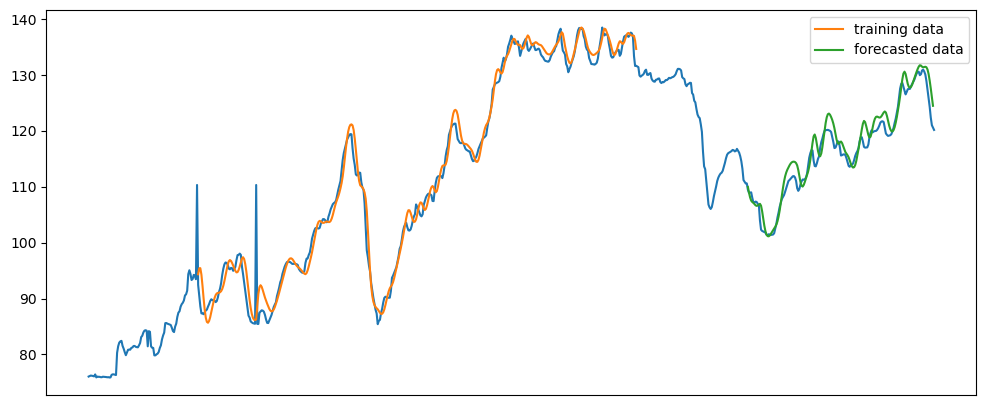

In [39]:
plt.figure(figsize=(12,5))
plt.plot(scaler.inverse_transform(petrolprice_df))
plt.plot(trainPredictPlot, label= "training data")
plt.plot(testPredictPlot, label= "forecasted data")
plt.xticks([])
plt.legend() 
plt.show()